Here we performed Feature selection for **Diabetes After Feature Engineering** Dataset.

## Feature Selection Techniques

In [1]:
import pandas as pd
data = pd.read_csv('datasets/Diabetes After Feature Engineering.csv')
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.330737,6.205037,36.329902,27.149304,20.023718,5.605497,0.310087,0.870964,1
1,0.738299,5.390749,33.865339,22.854380,11.929581,5.087564,0.225562,0.863878,0
2,2.695814,6.527653,33.033688,22.854380,20.067285,4.808004,0.320037,0.864470,1
3,0.738299,5.456704,33.865339,18.475901,13.590624,5.206304,0.132705,0.854735,0
4,0.000000,6.089163,22.561724,27.149304,17.924559,6.193787,0.394806,0.865025,1


In [2]:
X = data.drop('Outcome', axis= 1)
Y = data['Outcome']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((614, 8), (154, 8))

In [3]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
603,2.522655,6.225257,38.752350,22.854380,15.645104,5.712516,0.324205,0.871799
118,1.867137,5.580920,31.354045,18.475901,12.866988,5.214054,0.259198,0.856033
247,0.000000,6.369532,43.485684,25.725884,24.556112,6.575816,0.253814,0.857217
157,0.738299,5.750825,29.651155,16.994122,16.166911,4.972240,0.349805,0.857217
468,2.695814,5.892249,37.546134,24.294427,17.046939,5.350220,0.142543,0.867347


## 1) Correlation

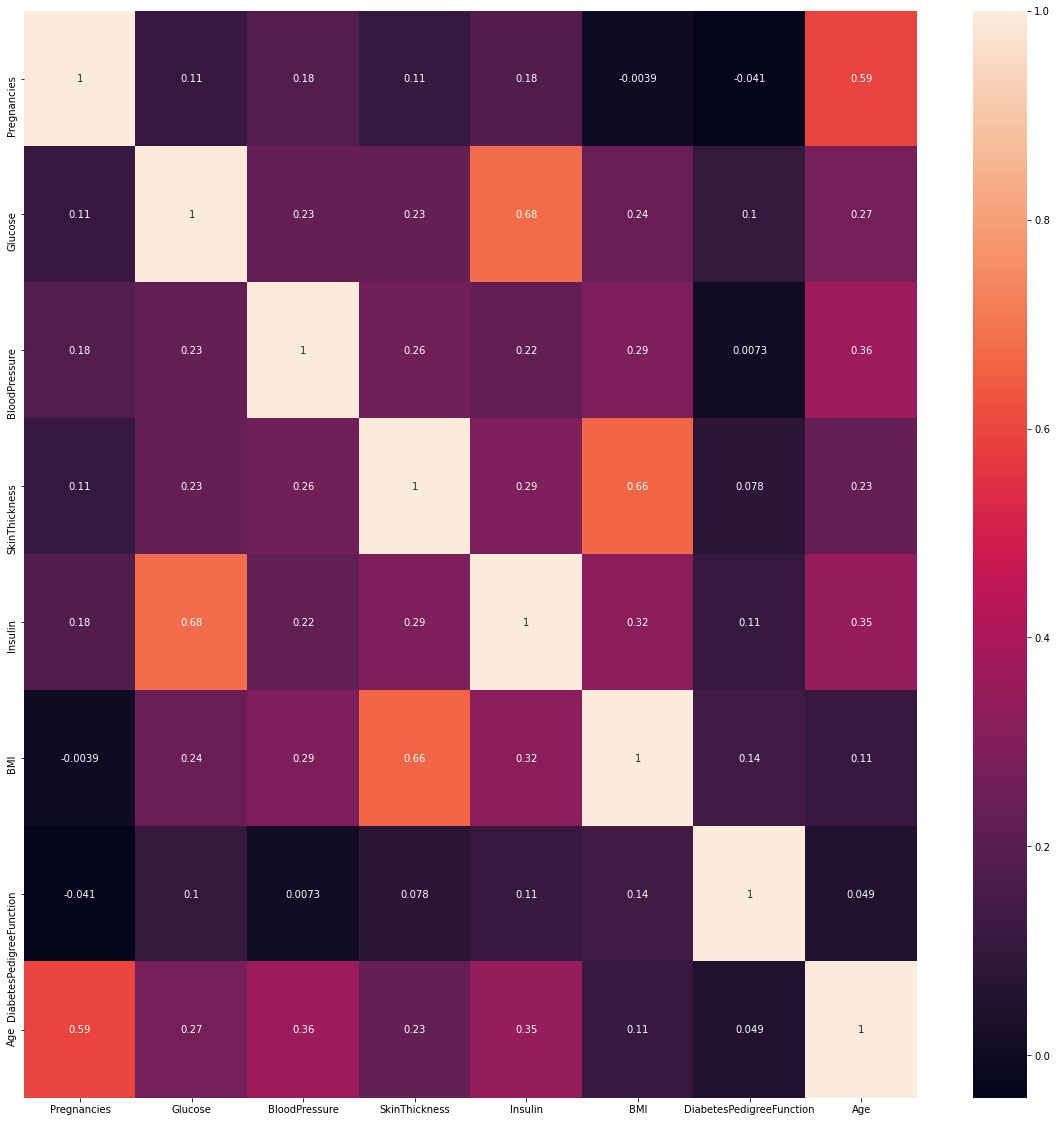

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
corr= X.corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(X.corr(),annot=True)


In the above figure we found out that there are ``no Highly`` correlated features with atleast ``70 or 80%``. So we go for recurssive feature elimination.

In [5]:
from sklearn.metrics import recall_score,confusion_matrix,classification_report

In [6]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import xgboost
from sklearn.naive_bayes import GaussianNB

In [7]:
#random forest parameters after hyper parameter optimisation.
rfc_params = {'class_weight': 'balanced_subsample',
              'max_depth': 5,
              'max_features': 'log2',
              'min_impurity_decrease': 1e-05,
              'min_samples_leaf': 9,
              'min_samples_split': 2,
              'n_estimators': 7,
              'random_state': 0,
              'n_jobs': -1}

In [8]:
RFC_Model = RandomForestClassifier(**rfc_params)
GBC_Model = GradientBoostingClassifier(n_estimators =60, learning_rate= 0.5224489795918368, max_depth=3, random_state = 0)
XGB_Model = xgboost.XGBClassifier(n_estimators = 16,max_depth = 3, reg_lambda=0.5789473684210527, n_jobs = -1, random_state = 0)

## 2) Recurssive Feature Elimination for 

**A) Random Forest Classifer**

In [9]:
from sklearn.feature_selection import RFE

In [10]:
def Run_Classification(model, X_train, X_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Recall_Score: ', recall_score(y_test, y_pred))

In [11]:
for index in range(1, 9):
    sel = RFE(estimator= RFC_Model, n_features_to_select = index)
    sel.fit(X_train, y_train)
    X_train_rfe = sel.transform(X_train)
    X_test_rfe = sel.transform(X_test)
    print('Selected Features: ', index)
    Run_Classification(RFC_Model, X_train_rfe, X_test_rfe)
    print()

Selected Features:  1
Recall_Score:  0.6382978723404256

Selected Features:  2
Recall_Score:  0.574468085106383

Selected Features:  3
Recall_Score:  0.7446808510638298

Selected Features:  4
Recall_Score:  0.7872340425531915

Selected Features:  5
Recall_Score:  0.7659574468085106

Selected Features:  6
Recall_Score:  0.8723404255319149

Selected Features:  7
Recall_Score:  0.851063829787234

Selected Features:  8
Recall_Score:  0.8085106382978723



Here No. of ``Features = 6`` gives the ``Recall Score`` of ``87.23``

**B) Gradient Boosting Classifier** 

In [12]:
for index in range(1, 9):
    sel = RFE(estimator= GBC_Model, n_features_to_select = index)
    sel.fit(X_train, y_train)
    X_train_rfe = sel.transform(X_train)
    X_test_rfe = sel.transform(X_test)
    print('Selected Features: ', index)
    Run_Classification(GBC_Model, X_train_rfe, X_test_rfe)
    print()

Selected Features:  1
Recall_Score:  0.46808510638297873

Selected Features:  2
Recall_Score:  0.5106382978723404

Selected Features:  3
Recall_Score:  0.6595744680851063

Selected Features:  4
Recall_Score:  0.6595744680851063

Selected Features:  5
Recall_Score:  0.6170212765957447

Selected Features:  6
Recall_Score:  0.5957446808510638

Selected Features:  7
Recall_Score:  0.574468085106383

Selected Features:  8
Recall_Score:  0.7872340425531915



For ``features=8`` we get ``Recall Score=78.7``

**C) XGBoost Classifier** 

In [13]:
for index in range(1, 9):
    sel = RFE(estimator= XGB_Model, n_features_to_select = index)
    sel.fit(X_train, y_train)
    X_train_rfe = sel.transform(X_train)
    X_test_rfe = sel.transform(X_test)
    print('Selected Features: ', index)
    Run_Classification(XGB_Model, X_train_rfe, X_test_rfe)
    print()

Selected Features:  1
Recall_Score:  0.46808510638297873

Selected Features:  2
Recall_Score:  0.574468085106383

Selected Features:  3
Recall_Score:  0.6382978723404256

Selected Features:  4
Recall_Score:  0.6382978723404256

Selected Features:  5
Recall_Score:  0.6808510638297872

Selected Features:  6
Recall_Score:  0.7446808510638298

Selected Features:  7
Recall_Score:  0.723404255319149

Selected Features:  8
Recall_Score:  0.7659574468085106



For ``features=8`` we get ``Recall Score=76.6``

# Final Result

Hence finally we select ``features=6`` for a **RandomForestClassifier**

In [14]:
#random forest parameters after hyper parameter optimisation.
rfc_params = {'class_weight': 'balanced_subsample',
              'max_depth': 5,
              'max_features': 'log2',
              'min_impurity_decrease': 1e-05,
              'min_samples_leaf': 9,
              'min_samples_split': 2,
              'n_estimators': 7,
              'random_state': 0,
              'n_jobs': -1}

RFC_Model = RandomForestClassifier(**rfc_params)

In [15]:
sel = RFE(estimator= RFC_Model, n_features_to_select = 6)
sel.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                     max_depth=5, max_features='log2',
                                     min_impurity_decrease=1e-05,
                                     min_samples_leaf=9, n_estimators=7,
                                     n_jobs=-1, random_state=0),
    n_features_to_select=6)

In [16]:
features = X_train.columns[sel.get_support()]
features

Index(['Glucose', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [17]:
X_train_rfe = sel.transform(X_train)
X_test_rfe = sel.transform(X_test)

In [18]:
X_train_rfe = pd.DataFrame(X_train_rfe, columns = features)
X_train_rfe.head()

,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.225257,22.854380,15.645104,5.712516,0.324205,0.871799
1,5.580920,18.475901,12.866988,5.214054,0.259198,0.856033
2,6.369532,25.725884,24.556112,6.575816,0.253814,0.857217
3,5.750825,16.994122,16.166911,4.972240,0.349805,0.857217
4,5.892249,24.294427,17.046939,5.350220,0.142543,0.867347


## Test Score

In [19]:
def Run_Classification(model, X_train, X_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Recall_Score: ', recall_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print(confusion_matrix(y_test, y_pred))

In [20]:
Run_Classification(RFC_Model, X_train_rfe, X_test_rfe)

Recall_Score:  0.8723404255319149
              precision    recall  f1-score   support

           0       0.94      0.83      0.88       107
           1       0.69      0.87      0.77        47

    accuracy                           0.84       154
   macro avg       0.82      0.85      0.83       154
weighted avg       0.86      0.84      0.85       154


[[89 18]
 [ 6 41]]


## Training Score

In [21]:
RFC_Model.fit(X_train_rfe, y_train)
y_pred_1 = RFC_Model.predict(X_train_rfe)
print('Train Recall_Score: ', recall_score(y_train, y_pred_1))
print(classification_report(y_train, y_pred_1))
print()
print(confusion_matrix(y_train, y_pred_1))

Train Recall_Score:  0.8642533936651584
              precision    recall  f1-score   support

           0       0.91      0.76      0.83       393
           1       0.67      0.86      0.75       221

    accuracy                           0.80       614
   macro avg       0.79      0.81      0.79       614
weighted avg       0.82      0.80      0.80       614


[[298  95]
 [ 30 191]]


Here we got good and also Almost equal for Both ``Train`` and ``Test`` Data **Recall Scores** 
